## Maternal Risk Prediction

In [37]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib

In [38]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [39]:
# Seting random seed for reproducibility
np.random.seed(42)

In [40]:
# Loading the dataset
df = pd.read_csv(r'C:\Users\hp\Desktop\Data-Science\04.Capstone-Projects\3MTT July Knowledge Showcase\Maternal Health Risk Data Set.csv')

In [41]:
# Exploratory Data Analysis
print("\n=== Dataset Overview ===")
print(f"Shape: {df.shape}")


=== Dataset Overview ===
Shape: (1014, 7)


In [42]:
print("\nFirst 5 rows:")
display(df.head())

print("\n=== Statistical Summary ===")
display(df.describe())

print("\n=== Risk Level Distribution ===")
print(df['RiskLevel'].value_counts())


First 5 rows:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk



=== Statistical Summary ===


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000



=== Risk Level Distribution ===
RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


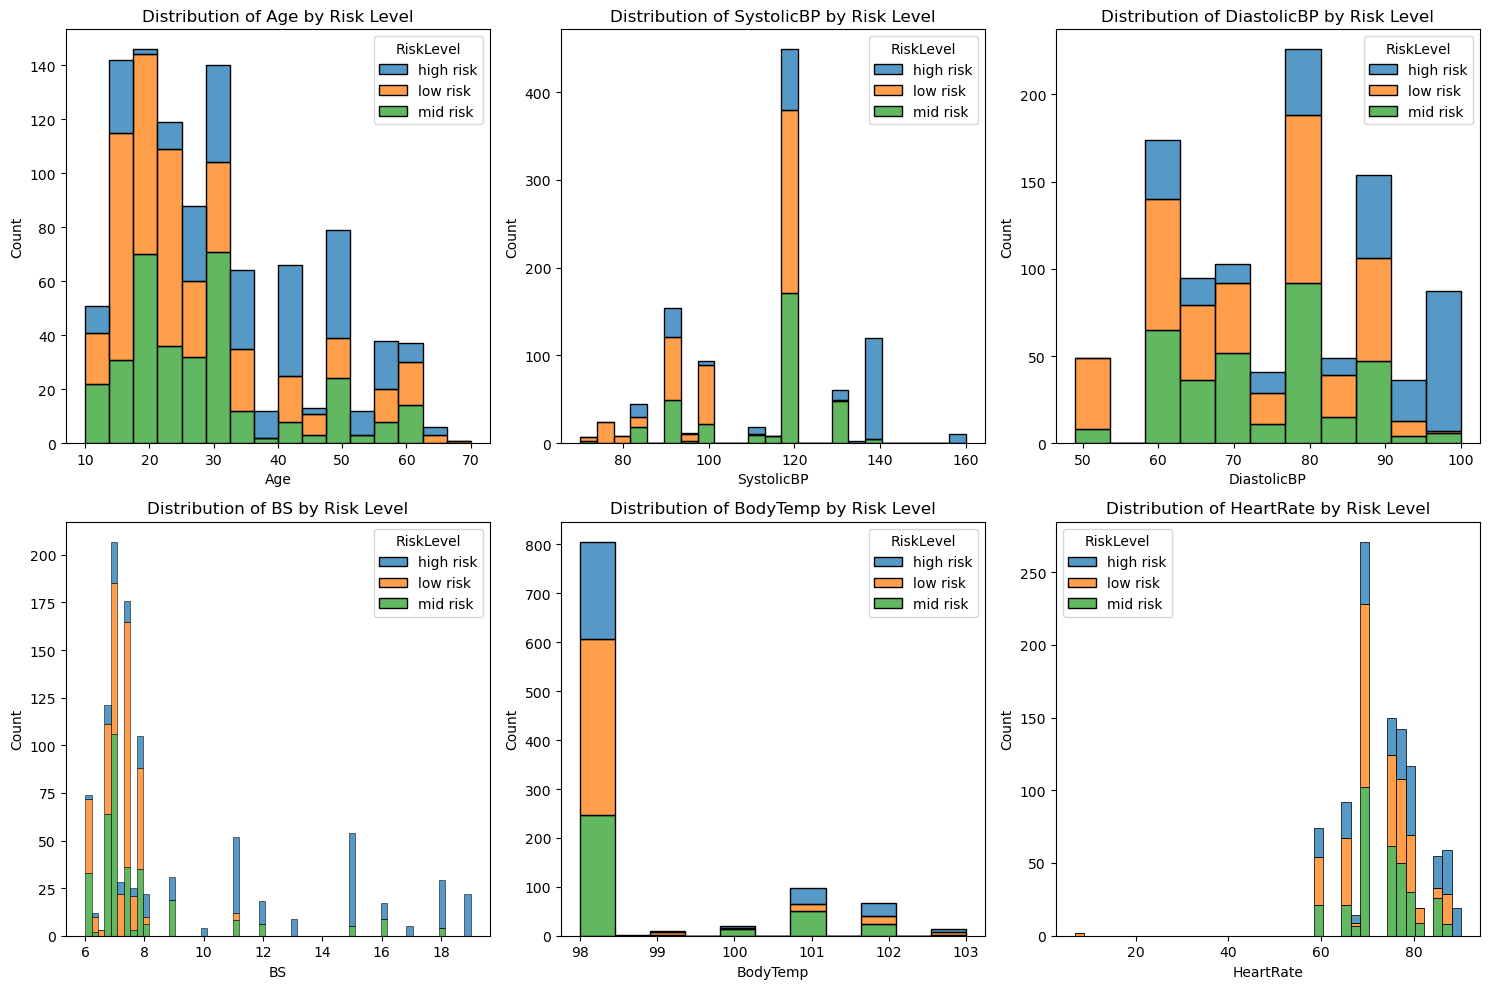

In [43]:
# Visualizations
plt.figure(figsize=(15, 10))

# Histograms for numerical features
numerical_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, hue='RiskLevel', multiple='stack')
    plt.title(f'Distribution of {col} by Risk Level')

plt.tight_layout()
plt.show()

# Data Preprocessing

In [44]:
# Convert risk levels to numerical
encoder = LabelEncoder()
df['RiskLevel'] = encoder.fit_transform(df['RiskLevel'])  # 0=low, 1=medium, 2=high

# Lets Check for missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Missing Values ===
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [45]:
# Spliting features and target
#X = df.drop('RiskLevel', axis=1)
X = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = df['RiskLevel']

## Model Training

In [46]:
# Spliting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Now lets Initialize and train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model Evaluation

In [48]:
# Lets Make predictions
y_pred = model.predict(X_test)

# Classification report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


=== Classification Report ===
              precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.86      0.76      0.81        80
    mid risk       0.74      0.84      0.79        76

    accuracy                           0.81       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.81      0.81       203



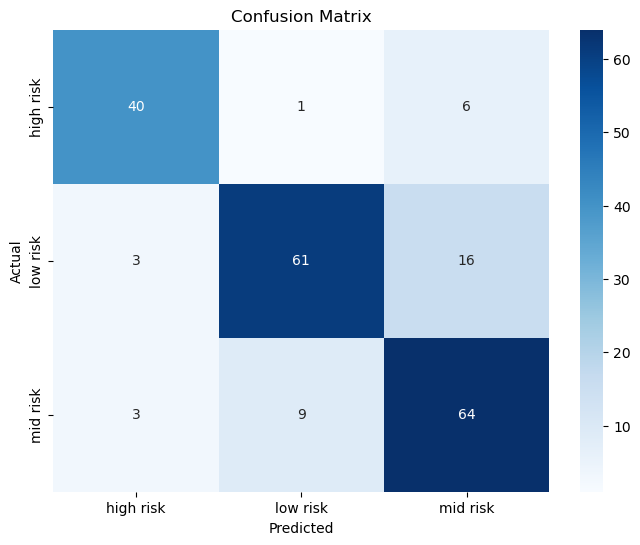

C:\Users\hp\AppData\Local\Temp\ipykernel_12472\932827192.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


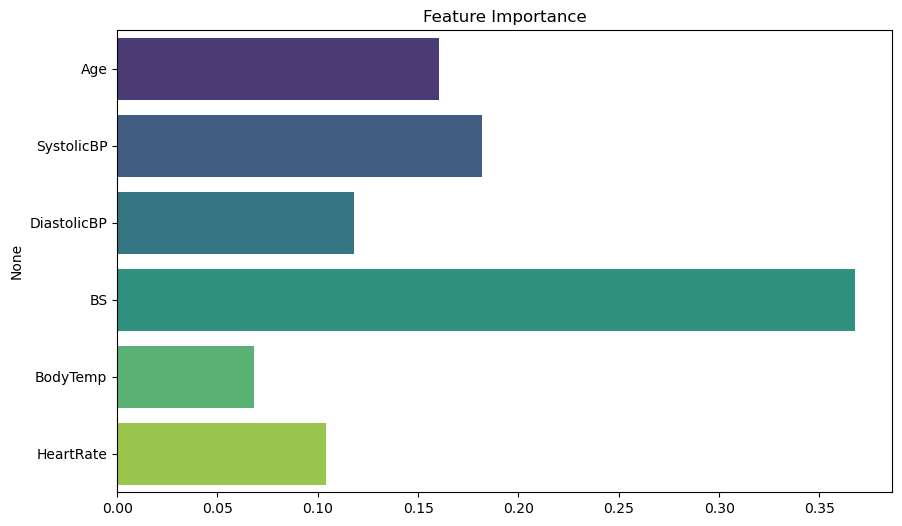

In [49]:
# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=encoder.classes_, 
            yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
plt.figure(figsize=(10, 6))
importances = model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importance')
plt.show()

## Saving the Model

In [50]:
# Save model and encoder
joblib.dump(model, 'maternal_risk_model.pkl')
joblib.dump(encoder, 'label_encoder.pkl')

print("Model and encoder saved successfully!")

Model and encoder saved successfully!


In [51]:
# Prediction Function
def predict_risk(Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate):
    """Predict maternal risk level from input features"""
    try:
        model = joblib.load('maternal_risk_model.pkl')
        encoder = joblib.load('label_encoder.pkl')
        
        data = [[Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate]]
        risk_code = model.predict(data)[0]
        return encoder.inverse_transform([risk_code])[0]
    except Exception as e:
        return f"Error: {str(e)}"

In [55]:
# Test prediction
test_case = {
    'Age': 32,
    'SystolicBP': 140,
    'DiastolicBP': 90,
    'BS': 7.5,
    'BodyTemp': 98.4,
    'HeartRate': 82
}

prediction = predict_risk(**test_case)
print(f"\nPregnancy Test Prediction: {prediction}")


Pregnancy Test Prediction: high risk


In [53]:
predict_risk(28, 110, 70, 6.8, 98.2, 68)

'low risk'